*This project has a large file size*

Follow these instructions to use LFS on GitHub
- git lfs install
- git lfs track 'data/yelp-reviews.csv'
- git add .gitattributes
- git add data/yelp-reviews.csv
- git commit -m 'Track large file with Git LFS'
- git push origin main

In [1]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

### **Load Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

file_path = 'data/yelp-reviews.csv'
df = load_data(file_path)
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


### **EDA**

In [3]:
# EDA
def perform_eda(df):
    missing_values = df.isna().sum()
    
    print(f'Number of missing values: {missing_values}')

perform_eda(df)
df.info()

Number of missing values: business_id    0
review_id      0
date           0
text           0
stars          0
language       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150374 entries, 0 to 150373
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150374 non-null  object
 1   review_id    150374 non-null  object
 2   date         150374 non-null  object
 3   text         150374 non-null  object
 4   stars        150374 non-null  int64 
 5   language     150374 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.9+ MB


In [4]:
# Summary statistics
statistics = df.describe().T
print('Summary Statistics')
statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
stars,150374.0,4.006045,1.415824,1.0,3.0,5.0,5.0,5.0


### **Data Visualization**

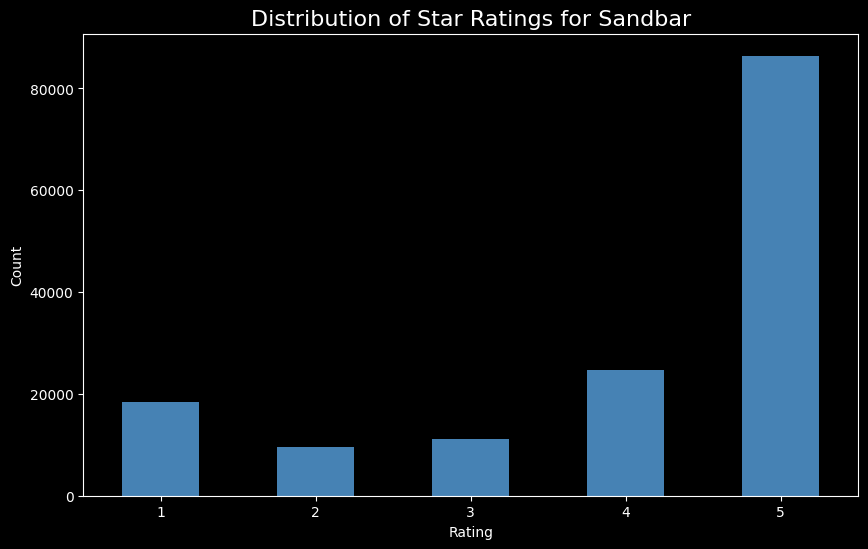

In [5]:
# Dark mode
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
df['stars'].value_counts().sort_index().plot(kind='bar', color='steelblue')

plt.title('Distribution of Star Ratings for Sandbar', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **Data Preprocessing**

In [6]:
import re

# Clean text data
def clean_data(df, text_column):
    
    # Remove missing values
    df = df.dropna(subset=[text_column, 'stars'])
    
    # Normalize text data
    df[text_column] = df[text_column].str.lower()
    
    # Remove punctuation and special characters
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
    
    return df

df = clean_data(df, text_column='text')
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en


In [7]:
# Check for NaN/missing values in the text column
missing_text = df['text'].isna().sum()
print(f'Number of missing values in text column: {missing_text}')

Number of missing values in text column: 0


### **Feature Engineering** (Tokenization and Lemmatization)

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('punkt_tab') if not downloaded

# Initialize the stopwords object
stop_words = set(stopwords.words('english'))

# Preprocess text => tokens, remove stopwords and join tokens
def preprocess_text_to_tokens(text):
    
    # Tokeinize text and filter stopwords
    filtered_tokens = [
        word for word in word_tokenize(text.lower()) if word not in stop_words
    ]
    
    # Join the tokens into a string
    return ' '.join(filtered_tokens)

# Create a tokens column and apply preprocessing to the text column and store the results in a tokens column
df['tokens'] = df['text'].apply(preprocess_text_to_tokens)

# Check transformations
df[['text', 'tokens']].head() # return only the text and tokens columns

,text,tokens
0,lynn and montecito flowers are simply the best...,lynn montecito flowers simply best awesome cho...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer and stopwords object
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text => lemmas, remove stopwords and join lemmas
def preprocess_text_to_lemmas(text):
    
    # Lemmatize text and filter stopwords
    lemmas = [
        lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stop_words
    ]
    
    # Join the lemmas into a string
    return ' '.join(lemmas)

# Create a lemmas column and apply preprocessing to the text column and store the results in a lemmas column
df['lemmas'] = df['text'].apply(preprocess_text_to_lemmas)

# Check transformations
df[['text', 'lemmas']].head() # return only the text and lemmas columns

,text,lemmas
0,lynn and montecito flowers are simply the best...,lynn montecito flower simply best awesome choi...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [10]:
# Display transformed dataframe
df.head()

,business_id,review_id,date,text,stars,language,tokens,lemmas
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en,lynn montecito flowers simply best awesome cho...,lynn montecito flower simply best awesome choi...
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en,love place always loved food truly due killer ...,love place always loved food truly due killer ...
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en,stayed last weekend dog motel style inside fou...,stayed last weekend dog motel style inside fou...
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en,came quick bite got thai salad bowl white bean...,came quick bite got thai salad bowl white bean...
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en,finally able try lunch holdrens husband ordere...,finally able try lunch holdrens husband ordere...


### **Time Series Preprocessing**
- Create a resampled dataset for time series analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert review dates to datetime objects
def convert_to_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') # Convert to datetime, handle errors
    
    return df

# Set the date as the index
def set_date_as_index(df, date_column):
    df.set_index(date_column, inplace=True)
    
    return df

# Resample the data by a specific time interval
def resample_data(df, interval='ME'): # 'M' stands for months, 'D' stands for daily, 'W' for weekly
    df_resampled = df.resample(interval).mean()
    
    return df_resampled

In [12]:
# Reset index if 'date' is currently an index and not a column
df.reset_index(inplace=True)

# Then you can apply your original function to convert 'date' column to datetime
df = convert_to_datetime(df, date_column='date')

# After conversion, set 'date' back as the index
df = set_date_as_index(df, date_column='date')

def resample_numeric_data(df, interval='M'):
    # Select only numeric columns for resampling
    numeric_df = df.select_dtypes(include='number')
    df_resampled = numeric_df.resample(interval).mean()
    return df_resampled

# Check if 'date' is already set as index
if 'date' in df.columns:
    df = set_date_as_index(df, date_column='date')

# Resample numeric data only
df_resampled = resample_numeric_data(df, interval='M')

# Check resampled data
df_resampled.head()

C:\Users\erwin\AppData\Local\Temp\ipykernel_15676\2098222764.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = numeric_df.resample(interval).mean()


,index,stars
date,,
2015-01-31,1348.0,3.936967
2015-02-28,3965.0,3.932598
2015-03-31,6596.5,3.923698
2015-04-30,9346.0,3.962856
2015-05-31,12285.5,3.933677


In [13]:
# Save the dataframe
output_path = 'data/reviews_processed_tsa.csv'
df_resampled.to_csv(output_path)
print(f'Processed dataframed saved to {output_path}')

Processed dataframed saved to data/reviews_processed_tsa.csv


In [14]:
# Load cleaned dataframe
df_resampled = pd.read_csv('data/reviews_processed_tsa.csv', keep_default_na=False)

# Check for missing values
missing_values = df_resampled.isna().sum()
print(f'Number of missing values: {missing_values}')

Number of missing values: date     0
index    0
stars    0
dtype: int64


### **Time Series Analysis**

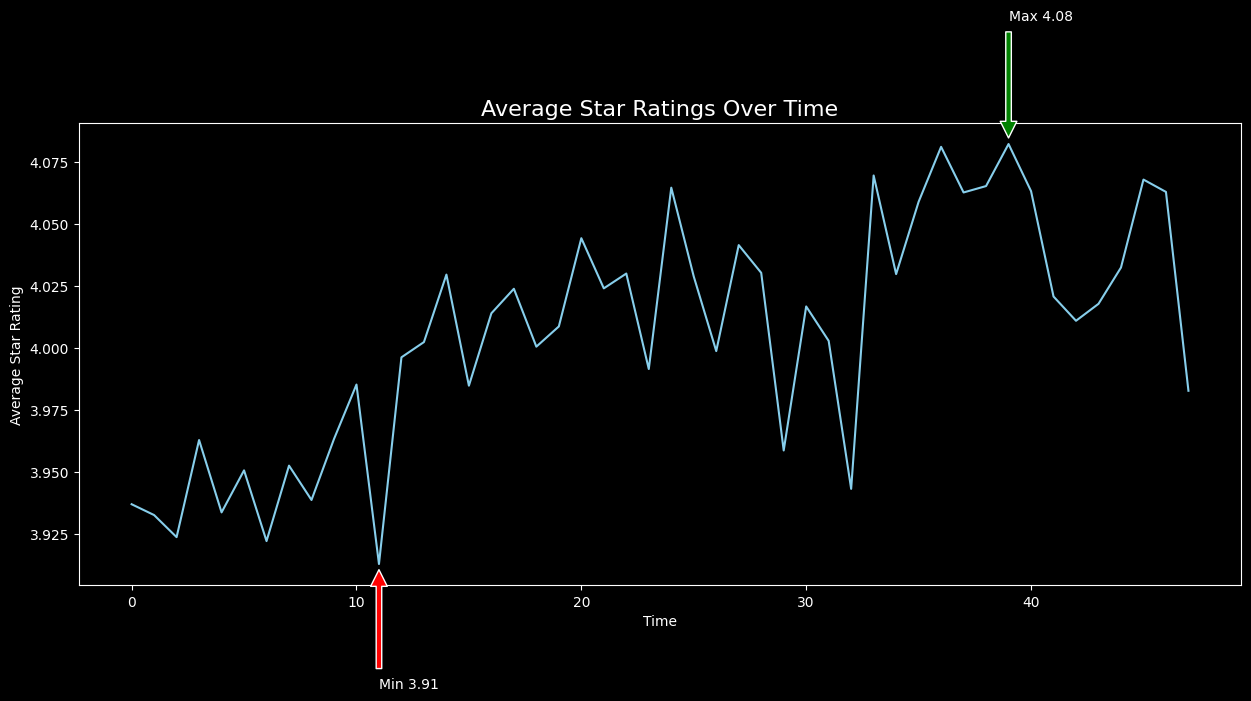

In [15]:
import matplotlib.pyplot as plt

# Annotating the hightest and lowest points
max_value = df_resampled['stars'].max()
min_value = df_resampled['stars'].min()
max_date = df_resampled['stars'].idxmax()
min_date = df_resampled['stars'].idxmin()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], color='skyblue')
plt.title('Average Star Ratings Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')

plt.annotate(f'Max {max_value:.2f}',
             xy=(max_date, max_value),
             xytext=(max_date, max_value + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate(f'Min {min_value:.2f}',
             xy=(min_date, min_value),
             xytext=(min_date, min_value + - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

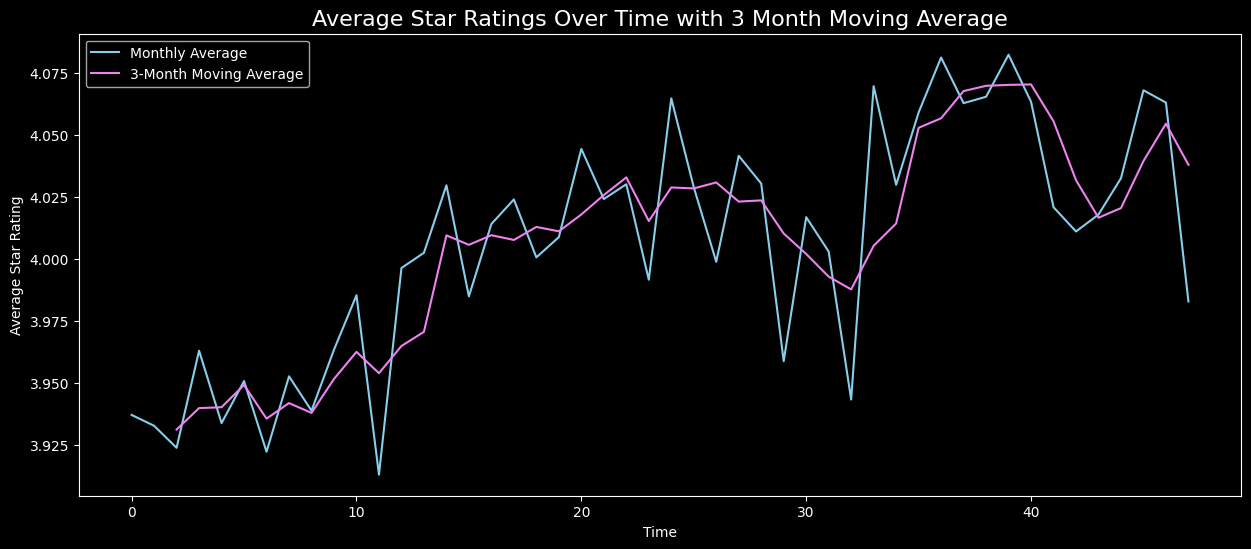

In [16]:
# Calculate 3 month-moving average
df_resampled['3-month-MA'] = df_resampled['stars'].rolling(window=3).mean()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], label='Monthly Average', color='skyblue')
plt.plot(df_resampled.index, df_resampled['3-month-MA'], label='3-Month Moving Average', color='violet')
plt.title('Average Star Ratings Over Time with 3 Month Moving Average', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')
plt.legend(loc='best')
plt.show()

### **Deep Learning**
- Data Preparation

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create sequences from the time series data
def create_sequences(data, sequence_length):
    
    sequences = []
    targets = []
    
    # Loop
    for start_index in range(len(data) - sequence_length):
        end_index = start_index + sequence_length
        sequence = data[start_index:end_index]
        target = data[end_index]
        
        sequences.append(sequence)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Sequence length 3 for quarterly, 6 is semi-annual, 12 is for annual
sequence_length = 3 # for 3 months or quarterly
X, y = create_sequences(df_resampled['stars'].values, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### LSTM Model (Long Short Term Memory) Deep Learning Model

common errors:
- ModuleNotFoundError: No module named 'tensorflow'
- `pip install tensorflow`

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape, units_first_layer, units_second_layer, dropout_first, dropout_second):
    
    # Initialize model
    model = Sequential()
    
    # Add first layer with dropout
    model.add(LSTM(units=units_first_layer, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_first))
    
    # Add second layer with dropout
    model.add(LSTM(units=units_second_layer, return_sequences=False))
    model.add(Dropout(dropout_second))
    
    # Add output layer
    model.add(Dense(units=1))
    
    return model

# Compile the model
def compile_model(model, optimizer, loss):
    model.compile(optimizer=optimizer, loss=loss)
    
    return model

In [19]:
# Define input shape
input_shape = (X_train.shape[1], 1)

# Build the model
model = build_lstm_model(input_shape, units_first_layer=100, units_second_layer=50, dropout_first=0.5, dropout_second=0.2)

# Compile the model
model = compile_model(model, optimizer='adam', loss='mean_squared_error')

c:\Users\erwin\AppData\Local\pypoetry\Cache\virtualenvs\src-tGtY0oT1-py3.11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
from tqdm.keras import TqdmCallback

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[TqdmCallback(verbose=1)]
)

c:\Users\erwin\AppData\Local\pypoetry\Cache\virtualenvs\src-tGtY0oT1-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 15.5747

  1%|          | 1/100 [00:02<04:41,  2.84s/epoch, loss=15.6, val_loss=15.2]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 15.5747 - val_loss: 15.2014


Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 14.9962 - val_loss: 14.4934


Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.2286

  3%|▎         | 3/100 [00:02<01:15,  1.29epoch/s, loss=14.2, val_loss=13.8]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 14.2286 - val_loss: 13.7883


Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.3621 - val_loss: 13.0782


Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.7225

  5%|▌         | 5/100 [00:03<00:38,  2.47epoch/s, loss=12.7, val_loss=12.4]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.7225 - val_loss: 12.3570


Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.1500 - val_loss: 11.6210


Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.5273

  7%|▋         | 7/100 [00:03<00:23,  3.89epoch/s, loss=11.5, val_loss=10.9]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.5273 - val_loss: 10.8667


Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.7044 - val_loss: 10.0921


Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.8296

  9%|▉         | 9/100 [00:03<00:16,  5.54epoch/s, loss=9.83, val_loss=9.3] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.8296 - val_loss: 9.2959


Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.1140 - val_loss: 8.4777


Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.2891

 11%|█         | 11/100 [00:03<00:12,  7.28epoch/s, loss=8.29, val_loss=7.64]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.2891 - val_loss: 7.6382


Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.4220 - val_loss: 6.7807


Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.9085

 13%|█▎        | 13/100 [00:03<00:09,  8.99epoch/s, loss=6.91, val_loss=5.91]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.9085 - val_loss: 5.9120


Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.7267 - val_loss: 5.0405


Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.4628

 15%|█▌        | 15/100 [00:03<00:07, 10.74epoch/s, loss=5.46, val_loss=4.18]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.4628 - val_loss: 4.1792


Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.7629 - val_loss: 3.3442


Epoch 17/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6971

 17%|█▋        | 17/100 [00:03<00:06, 12.30epoch/s, loss=3.7, val_loss=2.56] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.6971 - val_loss: 2.5551


Epoch 18/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.7203 - val_loss: 1.8342


Epoch 19/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.7623

 19%|█▉        | 19/100 [00:03<00:05, 13.68epoch/s, loss=1.76, val_loss=1.21]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.7623 - val_loss: 1.2079


Epoch 20/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.4199 - val_loss: 0.6957


Epoch 21/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9195

 21%|██        | 21/100 [00:03<00:05, 14.94epoch/s, loss=0.92, val_loss=0.318]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9195 - val_loss: 0.3177


Epoch 22/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4989 - val_loss: 0.0864


Epoch 23/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2746

 23%|██▎       | 23/100 [00:04<00:04, 15.93epoch/s, loss=0.275, val_loss=0.00197]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2746 - val_loss: 0.0020


Epoch 24/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2407 - val_loss: 0.0485


Epoch 25/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3347

 25%|██▌       | 25/100 [00:04<00:04, 16.51epoch/s, loss=0.335, val_loss=0.186]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3347 - val_loss: 0.1865


Epoch 26/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4247 - val_loss: 0.3634


Epoch 27/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4031

 27%|██▋       | 27/100 [00:04<00:04, 16.66epoch/s, loss=0.403, val_loss=0.538]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4031 - val_loss: 0.5379


Epoch 28/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4472 - val_loss: 0.6853


Epoch 29/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7022

 29%|██▉       | 29/100 [00:04<00:04, 16.89epoch/s, loss=0.702, val_loss=0.773]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7022 - val_loss: 0.7733


Epoch 30/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8137 - val_loss: 0.7961


Epoch 31/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6678

 31%|███       | 31/100 [00:04<00:04, 17.14epoch/s, loss=0.668, val_loss=0.769]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6678 - val_loss: 0.7686


Epoch 32/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5748 - val_loss: 0.7009


Epoch 33/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6945

 33%|███▎      | 33/100 [00:04<00:03, 17.11epoch/s, loss=0.694, val_loss=0.599]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6945 - val_loss: 0.5986


Epoch 34/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.7757 - val_loss: 0.4785


Epoch 35/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5641

 35%|███▌      | 35/100 [00:04<00:03, 17.62epoch/s, loss=0.564, val_loss=0.357]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5641 - val_loss: 0.3573


Epoch 36/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3707 - val_loss: 0.2493


Epoch 37/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3105

 37%|███▋      | 37/100 [00:04<00:03, 17.97epoch/s, loss=0.311, val_loss=0.158]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3105 - val_loss: 0.1578


Epoch 38/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3286 - val_loss: 0.0884


Epoch 39/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2714 - val_loss: 0.0391


Epoch 40/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1545

 40%|████      | 40/100 [00:04<00:03, 18.87epoch/s, loss=0.154, val_loss=0.0115]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1545 - val_loss: 0.0115


Epoch 41/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2048 - val_loss: 0.0016


Epoch 42/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2570

 42%|████▏     | 42/100 [00:05<00:03, 18.76epoch/s, loss=0.257, val_loss=0.00439]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2570 - val_loss: 0.0044


Epoch 43/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1849 - val_loss: 0.0160


Epoch 44/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2212

 44%|████▍     | 44/100 [00:05<00:03, 18.45epoch/s, loss=0.221, val_loss=0.0324] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2212 - val_loss: 0.0324


Epoch 45/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1804 - val_loss: 0.0524


Epoch 46/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3157

 46%|████▌     | 46/100 [00:05<00:02, 18.81epoch/s, loss=0.316, val_loss=0.0701]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3157 - val_loss: 0.0701


Epoch 47/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2796 - val_loss: 0.0822


Epoch 48/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2391

 48%|████▊     | 48/100 [00:05<00:02, 18.24epoch/s, loss=0.239, val_loss=0.088] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2391 - val_loss: 0.0880


Epoch 49/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1744 - val_loss: 0.0888


Epoch 50/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2772

 50%|█████     | 50/100 [00:05<00:02, 18.60epoch/s, loss=0.277, val_loss=0.0828]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2772 - val_loss: 0.0828


Epoch 51/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2471 - val_loss: 0.0741


Epoch 52/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1415

 52%|█████▏    | 52/100 [00:05<00:02, 18.80epoch/s, loss=0.142, val_loss=0.0637]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1415 - val_loss: 0.0637


Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3050 - val_loss: 0.0507


Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2328

 54%|█████▍    | 54/100 [00:05<00:02, 18.82epoch/s, loss=0.233, val_loss=0.0373]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2328 - val_loss: 0.0373


Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2157 - val_loss: 0.0254


Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1821

 56%|█████▌    | 56/100 [00:05<00:02, 18.73epoch/s, loss=0.182, val_loss=0.0158]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1821 - val_loss: 0.0158


Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1630 - val_loss: 0.0087


Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2171 - val_loss: 0.0038


Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1952

 59%|█████▉    | 59/100 [00:05<00:02, 19.14epoch/s, loss=0.195, val_loss=0.0015]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1952 - val_loss: 0.0015


Epoch 60/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2694 - val_loss: 0.0018


Epoch 61/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1677

 61%|██████    | 61/100 [00:06<00:02, 19.21epoch/s, loss=0.168, val_loss=0.00407]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1677 - val_loss: 0.0041


Epoch 62/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1457 - val_loss: 0.0081


Epoch 63/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1550

 63%|██████▎   | 63/100 [00:06<00:01, 19.16epoch/s, loss=0.155, val_loss=0.0126] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1550 - val_loss: 0.0126


Epoch 64/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1574 - val_loss: 0.0165


Epoch 65/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1966

 65%|██████▌   | 65/100 [00:06<00:01, 18.93epoch/s, loss=0.197, val_loss=0.0197]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1966 - val_loss: 0.0197


Epoch 66/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2032 - val_loss: 0.0223


Epoch 67/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1708 - val_loss: 0.0236


Epoch 68/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1379

 68%|██████▊   | 68/100 [00:06<00:01, 19.38epoch/s, loss=0.138, val_loss=0.0243]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1379 - val_loss: 0.0243


Epoch 69/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2101 - val_loss: 0.0232


Epoch 70/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2136

 70%|███████   | 70/100 [00:06<00:01, 18.66epoch/s, loss=0.214, val_loss=0.0227]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2136 - val_loss: 0.0227


Epoch 71/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1724 - val_loss: 0.0202


Epoch 72/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1894

 72%|███████▏  | 72/100 [00:06<00:01, 18.63epoch/s, loss=0.189, val_loss=0.0161]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1894 - val_loss: 0.0161


Epoch 73/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1446 - val_loss: 0.0122


Epoch 74/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2053 - val_loss: 0.0085


Epoch 75/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2027

 75%|███████▌  | 75/100 [00:06<00:01, 19.14epoch/s, loss=0.203, val_loss=0.00559]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2027 - val_loss: 0.0056


Epoch 76/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2063 - val_loss: 0.0038


Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1914 - val_loss: 0.0025


Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1822

 78%|███████▊  | 78/100 [00:06<00:01, 19.41epoch/s, loss=0.182, val_loss=0.00177]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1822 - val_loss: 0.0018


Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1669 - val_loss: 0.0015


Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1363

 80%|████████  | 80/100 [00:07<00:01, 19.45epoch/s, loss=0.136, val_loss=0.0014] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1363 - val_loss: 0.0014


Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1545 - val_loss: 0.0013


Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2352 - val_loss: 0.0013


Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1299

 83%|████████▎ | 83/100 [00:07<00:00, 19.59epoch/s, loss=0.13, val_loss=0.00137]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1299 - val_loss: 0.0014


Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1332 - val_loss: 0.0014


Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2221

 85%|████████▌ | 85/100 [00:07<00:00, 18.45epoch/s, loss=0.222, val_loss=0.00141]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2221 - val_loss: 0.0014


Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1317 - val_loss: 0.0013


Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2052

 87%|████████▋ | 87/100 [00:07<00:00, 18.61epoch/s, loss=0.205, val_loss=0.00132]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2052 - val_loss: 0.0013


Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2313 - val_loss: 0.0013


Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2022

 89%|████████▉ | 89/100 [00:07<00:00, 18.83epoch/s, loss=0.202, val_loss=0.00134]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2022 - val_loss: 0.0013


Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1475 - val_loss: 0.0014


Epoch 91/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1010

 91%|█████████ | 91/100 [00:07<00:00, 18.63epoch/s, loss=0.101, val_loss=0.00157]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1010 - val_loss: 0.0016


Epoch 92/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1122 - val_loss: 0.0018


Epoch 93/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1590

 93%|█████████▎| 93/100 [00:07<00:00, 18.44epoch/s, loss=0.159, val_loss=0.00203]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1590 - val_loss: 0.0020


Epoch 94/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1599 - val_loss: 0.0024


Epoch 95/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2116

 95%|█████████▌| 95/100 [00:07<00:00, 18.78epoch/s, loss=0.212, val_loss=0.00273]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2116 - val_loss: 0.0027


Epoch 96/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1881 - val_loss: 0.0030


Epoch 97/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2470

 97%|█████████▋| 97/100 [00:08<00:00, 18.99epoch/s, loss=0.247, val_loss=0.00293]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2470 - val_loss: 0.0029


Epoch 98/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2164 - val_loss: 0.0029


Epoch 99/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0974

 99%|█████████▉| 99/100 [00:08<00:00, 18.99epoch/s, loss=0.0974, val_loss=0.00349]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0974 - val_loss: 0.0035


Epoch 100/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1222 - val_loss: 0.0038


100%|██████████| 100/100 [00:08<00:00, 12.25epoch/s, loss=0.122, val_loss=0.00381]


### **Model Evaluation**

In [21]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# def evaluate_model(model, X_test, y_test):
    
#     test_loss = model.evaluate(X_test, y_test)
#     print(f'Test Loss: {test_loss}')
    
#     return test_loss

# def calculate_metrics(y_test, predictions):
#     mse = mean_squared_error(y_test, predictions)
#     mae = mean_absolute_error(y_test, predictions)
    
#     print(f'Mean Squared Error: {mse}')
#     print(f'Mean Absolute Error: {mae}')
    
#     return mse, mae

# def predict_and_evaluate(model, X_test, y_test):
    
#     # Evaluate model
#     test_loss = evaluate_model(model, X_test, y_test)
#     predictions = model.predict(X_test)
    
#     # Calculate metrics
#     mse, mae = calculate_metrics(y_test, predictions)
    
#     return predictions, mse, mae

# predictions, mse, mae = predict_and_evaluate(model, X_test, y_test)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')
    
    return test_loss

def calculate_metrics(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    
    return mse, mae

def predict_and_evaluate(model, X_test, y_test):
    
    # Evaluate model
    test_loss = evaluate_model(model, X_test, y_test)
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mse, mae = calculate_metrics(y_test, predictions)
    
    return predictions, mse, mae

predictions, mse, mae = predict_and_evaluate(model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0053
Test Loss: 0.0052533745765686035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Mean Squared Error: 0.005253363178850483
Mean Absolute Error: 0.0644293984162192


LSTM Model Performance


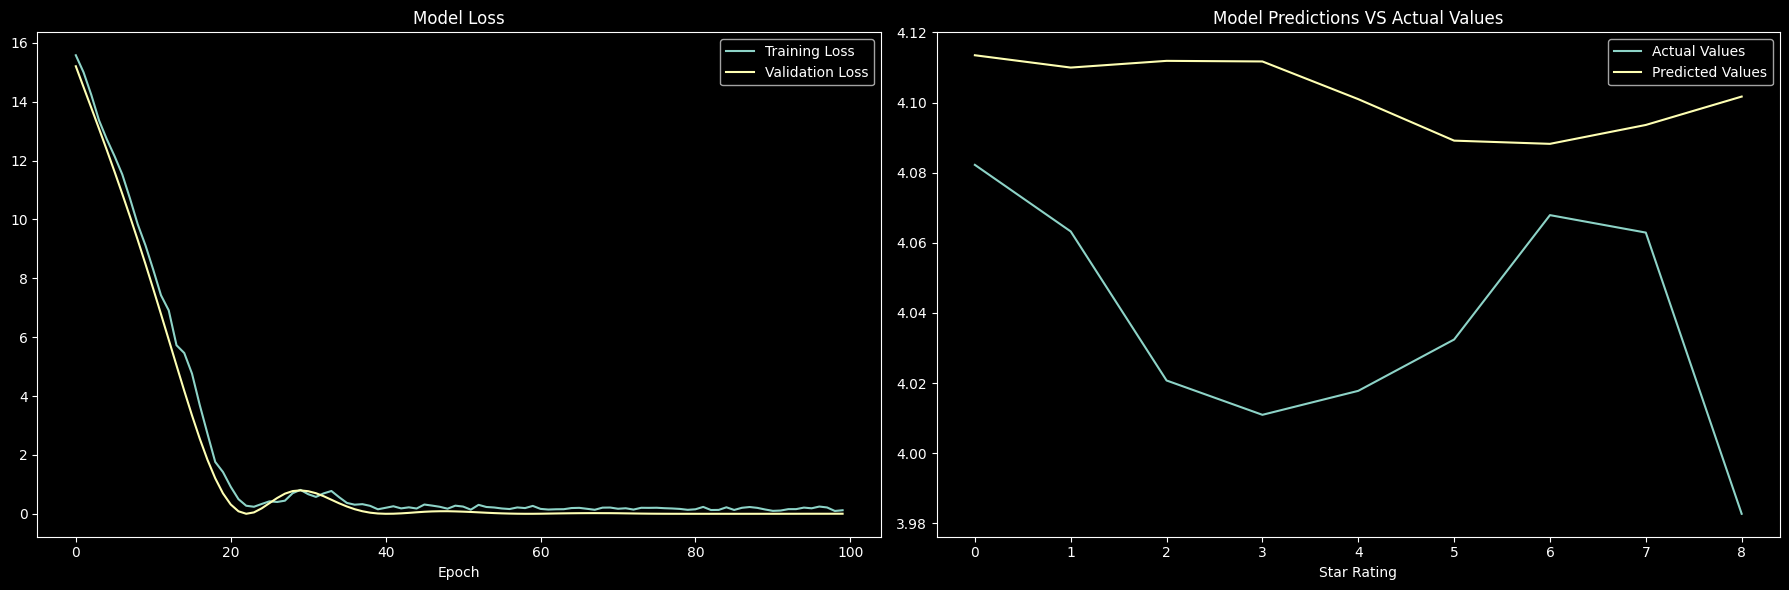

In [22]:
import matplotlib.pyplot as plt

def plot_training_and_predictions(history, y_test, predictions):
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Training and validation loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()
    
    # Prediction VS Actual Values
    axes[1].plot(y_test, label='Actual Values')
    axes[1].plot(predictions, label='Predicted Values')
    axes[1].set_title('Model Predictions VS Actual Values')
    axes[1].set_xlabel('Time')
    axes[1].set_xlabel('Star Rating')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
print('LSTM Model Performance')
plot_training_and_predictions(history, y_test, predictions)

In [23]:
# Save model
model.save('models/lstm_model.h5')

### **VADER**

In [26]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon') # if not already downloaded

# Initialize the VADER object
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to the text data
def apply_vader(text):
    
    return analyzer.polarity_scores(text)

# Create vader_scores and vader_compound columns
df['vader_scores'] = df['text'].apply(apply_vader)
df['vader_compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Convert compound score to sentiment labels
def vader_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
df['vader_sentiment'] = df['vader_compound'].apply(vader_sentiment_label)

# Map stars to true_label for evaluation
def map_stars_to_sentiment(stars):
    if stars >= 4:
        return 'Positive'
    elif stars < 3:
        return 'Negative'
    else:
        return 'Neutral'
    
df['true_label'] = df['stars'].apply(map_stars_to_sentiment)

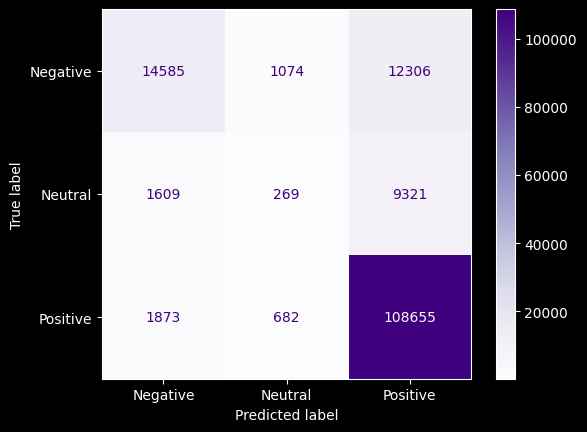

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Negative', 'Neutral', 'Positive']

# Create confusion matrix
cm = confusion_matrix(df['true_label'], df['vader_sentiment'], labels=labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

disp.plot(cmap='Purples')
plt.title('')
plt.show()

### **Naive Bayes**

In [28]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vectorize text
def vectorize_text(text_data):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text_data)
    
    return X, vectorizer

# Create binary target based on star rating
def prepare_target_variable(stars, threshold=4):
    return stars >= threshold

# Classifier model
def train_naive_bayes(X_train, y_train):
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)
    
    return nb_classifier

# Evaluate model
def evaluate_model_nb(model, X_test, y_test):
    test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)
    
    return accuracy, test_pred

In [29]:
# Vectorize text
X, vectorizer = vectorize_text(text_data=df['lemmas'])
y = df['true_label']

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
nb_classifier = train_naive_bayes(X_train, y_train)
accuracy, test_pred = evaluate_model_nb(model, X_test, y_test)

print(f'Naive Bayes Accuracy with TF-IDF (Multi-Class): {accuracy:.2f}')

 13/940 ━━━━━━━━━━━━━━━━━━━━ 6:02:48 23s/step

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification report
report = classification_report(y_test, test_pred, labels=labels)

# Confusion matrix
cm = confusion_matrix(y_test, test_pred, labels=labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plt(cmap='Purples')
plt.title('Sentiment Analysis with Naive Bayes and TF-IDF (Multi-Class)')
plt.show()